In [4]:
import IPython.display as ipd

html = ipd.display(ipd.HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/p814BapRq2U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))
html

/Users/mton/miniconda3/envs/torch-gpu/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


There's been a bit of an explosion of AI-generated art recently, with the advent  
of CLIP-guided text-to-image methods and a renewed interest in all things  
generative. Diving into the various communities, I quickly realised that  
although there are lots of folks using these methods, only a small subset feel  
confident enough with the code to modify the notebooks being shared around. 
 
This course aims to change that by equipping more coders and artists with the  
understanding and tools necessary to explore this space, creating new tools and  
getting to grips with existing ones.

The idea had been brewing for some time, but when I put out this tweet expecting  
one or two responses and ended up with more engagement than I'd ever seen before  
it became obvious that this needs to happen asap :)

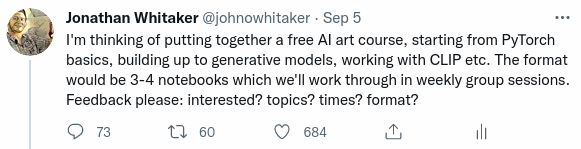

How was this `IMAGE` embedded ^? 

- ![Screenshot from 2021-09-12 09-08-09.png](data:image/png;base64 ... )

There's been a bit of an explosion of AI-generated art recently, with the advent  
of CLIP-guided text-to-image methods and a renewed interest in all things  
generative. Diving into the various communities, I quickly realised that  
although there are lots of folks using these methods, only a small subset feel  
confident enough with the code to modify the notebooks being shared around.  
This course aims to change that by equipping more coders and artists with the  
understanding and tools necessary to explore this space, creating new tools and  
getting to grips with existing ones.

The idea had been brewing for some time, but when I put out this tweet expecting  
 one or two responses and ended up with more engagement than I'd ever seen  
 before it became obvious that this needs to happen asap :)

We'll be using Discord to run the course and keep everything organised. If you  
haven't already, do join us there (https://discord.gg/P92X2pxC) to  
stay up-to-date on all things course-related. These notebooks are designed to  
work as standalone lessons, but you'll get much more value out of them if you  
join us in our weekly sessions (Sundays 4pm UTC) to work through the material  
together.

There will be four main lessons along with additional bonus notebooks. We'll  
start with Lesson #1 on September 19 and do one every week following that. The  
content for each lesson will hopefully be released at least a week before the  
live session. Links to the notebooks for each lesson will be included here as  
they become available:

- Lesson #1 (This one!): Intro to PyTorch and Optimizing via Gradient Descent
- Lesson #2: Learning Representations, ConvNets, Style Transfer and Auto-Encoders
- Lesson #3: GANs and CLIP
- Lesson #4: Going Further

# Navigating The Notebooks

![Navigating](https://c.tenor.com/CbhnRg0n7ksAAAAM/kermit-the-frog-looking-for-directions.gif)

We're cramming a lot into each lesson, but don't despair! A lot of the code will  
be illustrative examples which you can skim now and refer to later if you ever  
need to remind yourself about some specific function. 

Our goal is NOT to memorize everything, merely to get a high-level overview. I  
recommend collapsing sections as we complete them to make navigation easier, and  
if you get lost remember that you can see the table of contents in the panel on  
the left. 

Within each section there will be 
- Text explanations with code examples
- Video content (currently just part of the full run-through video linked at the top)
- Coding exercises to practice what you've learnt
- Discussion questions to talk through as a group, marked with **THINK/DISCUSS**

This is version one of this course, so there may be mistakes or concepts that  
are unclear. Please ask questions and share any feedback via Discord or directly  
during the live lessons.

The live lessons will be recorded (if participants are OK with that), so if  
you're working through this after we run the lesson there will be a video you  
can work along with linked here. 

At the start of each notebook, we'll have a setup section that imports some  
libraries that will give us access to functionality beyond that offered by  
Python's standard library. If you haven't already run it, scroll up to the  
start of this notebook and run the cell so that you're ready to view the videos  
and dive into the code. You'll notice the code is hidden - click 'show code' to  
see what's going on. Throughout these notebooks we'll hide code to keep things  
tidy, but you can always take a peek under the hood to see what's going on. 

# Section 1: Pytorch and Tensors

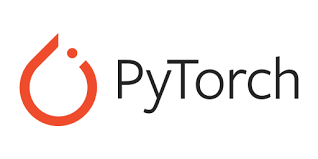

PyTorch is primarily a deep learning framework. It has been designed to make  
creating and working with deep neural networks as easy, fast and flexible as  
possible. Today we'll look at one of the core components that makes this  
possible: tensors. We'll start by looking at how to contruct and manipulate  
tensors, and then we'll explore the magic of autograd and how we can use it for  
optimization with gradient descent. 

Video:
- What is PyTorch?
- Creating tensors
- Modifying them
- Debugging tips
- Images as tensors

A lot of the material for this lessson was taken from the excellent content  
over at https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html

## 1.1 Creating Tensors

![tensor lesson 1](https://i.imgflip.com/5moxki.jpg)

We can construct a tensor directly from some common python iterables, such as  
list and tuple. Nested iterables can also be handled as long as the dimensions  
make sense.

In [5]:
import torch
import numpy as np

# tensor from a list
a = torch.tensor([0, 1, 2])

# tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2,3])
c = torch.tensor(c)

print(f'--[a]-- \n{a}')
print(f'--[b]-- \n{b}')
print(f'--[c]-- \n{c}')


--[a]-- 
tensor([0, 1, 2])
--[b]-- 
tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
--[c]-- 
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [4]:
# The numerical arguments we pass to these constructors determine the shape of  
# the output tensor - try changing them and see what happens

x = torch.ones(2,3)
print(f'--[x]-- \n{x}')
y = torch.zeros(3,2)
print(f'--[y]-- \n{y}')
# empty just allocates memory, and is slightly faster at creating tensors
# values aren't guaranteed to be initialized to zero, and can be Nan ...etc
z = torch.empty(1,1,5)
print(f'--[z]-- # 1 row, 1 column, 5 z-depth \n{z}')

--[x]-- 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
--[y]-- 
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
--[z]-- # 1 row, 1 column, 5 z-depth 
tensor([[[0., 0., 0., 0., 0.]]])


**THINK/DISCUSS** : Explain the `DIFFERENCE` between random `UNIFORM` and `NORMAL` distribution

 Random `UNIFORM` distribution and `NORMAL` distribution are both types of  
 probability distributions used in probability theory and statistics to  
 describe the distribution of a random variable.

 - A random `UNIFORM` distribution is a distribution where all values within a  
   defined range are equally likely to occur. In other words, every possible  
   value within the range has the same probability of occurring. For example,  
   if we have a uniform distribution over the interval [0,1], any value in that  
   interval is `EQUALLY LIKELY` to occur.  
 - A `NORMAL` distribution, on the other hand, is a distribution that is  
   `BELL-SHAPED` and `SYMMETRICAL` around a `CENTRAL` value. The normal distribution  
   is characterized by two parameters: MEAN and STANDARD DEVIATION. The `MEAN`  
   represents the `CENTRAL` value around which the distribution is symmetrical,  
   and the `STANDARD` deviation represents the `SPREAD` or variability of the  
   distribution. In a `NORMAL` distribution, more values are `LIKELY` to occur near   
   the `MEAN` than at the `TAILS`, and the probabilities of the values decrease as  
   they move further from the mean.  
   
 To summarize, the key difference between a random uniform distribution and a  
 normal distribution is that the former has an equal probability of every value  
 within a specified range, while the latter is bell-shaped and has a higher  
 probability of values near the mean and lower probabilities of values further  
 away from the mean.

In [5]:
# constructors for random numbers

# @audit-ok ☑ : Explain the difference between randn and rand
# ANSWER 🔎 :
# In NumPy, rand and randn are both methods that can be used to generate random 
# numbers. The key differences between rand and randn are:
# - rand generates random numbers from a uniform distribution over the interval 
#   (0, 1), while randn generates random numbers from a standard normal 
#   distribution with mean 0 and standard deviation 1.
# - rand takes a tuple (or integers separated by commas) specifying the shape of 
#   the output array as an argument, while randn takes individual integers 
#   representing the dimensions of the output array.
# In summary, rand generates numbers from a uniform distribution and takes the 
# shape of the output array as a tuple argument, while randn generates numbers 
# from a normal distribution and takes the dimensions of the output array as 
# individual integer arguments.

# uniform distribution
a = torch.rand(1,3)
print(f'--[a]-- rand  => [uniform] \n{a}')

# normal distribution
b = torch.randn(3,4) # randn ... n == normal
print(f'--[b]-- randn => [normal] \n{b}')

--[a]-- rand  => [uniform] 
tensor([[0.7452, 0.0201, 0.9506]])
--[b]-- randn => [normal] 
tensor([[ 1.0231,  0.1003,  0.5164,  0.0462],
        [-0.5955,  0.9366, -0.4558,  1.4725],
        [ 0.9049,  1.0111,  0.9385,  1.2295]])


(array([12.,  7., 11., 17., 11., 13., 10.,  4.,  5., 10.]),
 array([0.01165962, 0.11002375, 0.20838788, 0.306752  , 0.40511614,
        0.50348026, 0.6018444 , 0.7002085 , 0.79857266, 0.8969368 ,
        0.9953009 ], dtype=float32),
 <BarContainer object of 10 artists>)

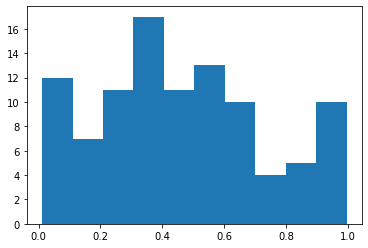

In [6]:
import matplotlib.pyplot as plt

# @audit 🖶 : plot a histogram of uniform distribution
uniform_plot = plt.hist(torch.rand(100))
uniform_plot

(array([  2.,  11.,  30.,  80., 110., 108.,  99.,  45.,  14.,   1.]),
 array([-3.2324388 , -2.6065595 , -1.9806802 , -1.3548008 , -0.72892153,
        -0.10304224,  0.52283704,  1.1487163 ,  1.7745957 ,  2.400475  ,
         3.0263543 ], dtype=float32),
 <BarContainer object of 10 artists>)

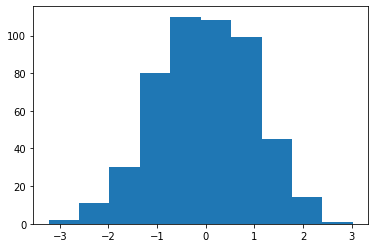

In [7]:
# @audit 🖶 : plot a histogram of normal distribution
normal_plot = plt.hist(torch.randn(500))
normal_plot

In [8]:
# construct NEW tensors with dimensions equal to EXISTING tensors
c = torch.zeros_like(a)
print(f'--[c]-- zeros_like(a) \n{c}\n')

d = torch.randn_like(b)
# @audit 🛑 : Explain why must be of tensor float else : "normal_kernel_cpu" not implemented for 'Long'
print(f'--[d]-- randn_like(b) \n{d}\n')


--[c]-- zeros_like(a) 
tensor([[0., 0., 0.]])

--[d]-- randn_like(b) 
tensor([[-0.1989, -0.1719, -0.2361,  1.3578],
        [ 0.9898, -1.0739,  0.2685,  0.8748],
        [ 0.8994, -0.7582, -0.6953, -1.0997]])



In [9]:
# Return evenly spaced values within a given interval.
a = torch.arange(0, 30, step=3)
print(f'--[a]-- # equivalent to np.arange(0, 30, step=3) \n{a}\n')

# np.linspace allows you to define how many values you get including the 
# specified min and max value. It infers the stepsize:
# Return evenly spaced numbers over a specified interval.
b = torch.linspace(0, 5, steps=11)
print(f'--[b]-- # equivalent to np.linspace(0, 5, steps=11) \n{b}\n')

--[a]-- # equivalent to np.arange(0, 30, step=3) 
tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

--[b]-- # equivalent to np.linspace(0, 5, steps=11) 
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



#### Coding Exercise 1 : Creating Tensors

Below you will find some incomplete code. Fill in the missing code to construct  
the specified tensors.  

We want the tensors:

`A` : 20 by 21 tensor consisting of ones  
`B` : a tensor with elements equal to the elements of numpy array Z  
`C` : a tensor with the same number of elements as A but with values ∼U(0,1)  
`D` : a 1D tensor containing the even numbers between 4 and 40 inclusive.  

In [10]:
# The numpy array required for B
Z = np.vander([1,2,3], 4)

A = torch.ones(20, 21)
print(f'20 by 21 tensor of ones => [A = {A.shape}]')

B = torch.tensor(Z)
print(f'[B = {B.shape}] with elements equal to elements of [Z = {Z.shape}]')

# The notation "∼U(0,1)" typically refers to a random variable that is UNIFORMLY 
# distributed between 0 and 1
C = torch.rand_like(A)
print(f'tensor same shape as [A], but UNIFORM random values between 0 and 1\n--[C]--\n{C}\n')

D = torch.arange(4, 41, step=2) # to be inclusive of 40, we need end=41 (40+1)
print(f'1D tensor of even numbers from 4 to 40 inclusive => [D]\n{D}')
# 

20 by 21 tensor of ones => [A = torch.Size([20, 21])]
[B = torch.Size([3, 4])] with elements equal to elements of [Z = (3, 4)]
tensor same shape as [A], but UNIFORM random values between 0 and 1
--[C]--
tensor([[0.1080, 0.4386, 0.1493, 0.0720, 0.0769, 0.2918, 0.9149, 0.5200, 0.1302,
         0.6890, 0.3564, 0.0633, 0.2771, 0.8863, 0.5478, 0.2136, 0.7206, 0.0162,
         0.4369, 0.3973, 0.0216],
        [0.1958, 0.5933, 0.1667, 0.0583, 0.6666, 0.8754, 0.5540, 0.1956, 0.0682,
         0.6998, 0.9744, 0.5458, 0.6357, 0.7391, 0.1315, 0.7159, 0.1307, 0.3415,
         0.1302, 0.5515, 0.6202],
        [0.2470, 0.3802, 0.9088, 0.0527, 0.4866, 0.1890, 0.3904, 0.3111, 0.5506,
         0.5581, 0.4755, 0.0663, 0.6939, 0.6596, 0.9776, 0.5796, 0.3450, 0.4587,
         0.1513, 0.0818, 0.1209],
        [0.6763, 0.0709, 0.7603, 0.0989, 0.5915, 0.9504, 0.0403, 0.5720, 0.9390,
         0.3694, 0.7961, 0.1237, 0.5258, 0.6931, 0.4668, 0.5385, 0.3544, 0.4134,
         0.6667, 0.4658, 0.4649],
        [0.18

## 1.2 Tensor Operations

![tensor operations](https://thumbs.gfycat.com/ElementaryDimpledBeardedcollie-max-1mb.gif)

We can perform operations on tensors using methods under `torch.`. However, in  
PyTorch most common Python operators are overridden, so we can use those  
instead. The `common standard arithmetic operators (+, -, \*, /, and **)` have   
all been `lifted to elementwise operations`.

In [11]:
x = torch.tensor([1,2,4,8])
y = torch.tensor([1,2,3,4])
print(f'[ADD] torch.add(x,y) = {torch.add(x,y)}')
print(f'[ADD]          x + y = {x + y} # element-wise addition')

print(f'SCRATCHPAD for other ELEMENT-WISE operations : ')
# @audit 🛑 : Explain what is x^y?  it's NOT exponentiation
x+y, x-y, x*y, x/y, x**y, x^y # the ** operator is exponentiation

[ADD] torch.add(x,y) = tensor([ 2,  4,  7, 12])
[ADD]          x + y = tensor([ 2,  4,  7, 12]) # element-wise addition
SCRATCHPAD for other ELEMENT-WISE operations : 


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]),
 tensor([ 0,  0,  7, 12]))

**THINK/DISCUSS:** What does element-wise mean, inspect the outputs above and discuss

ANSWER : `ELEMENT-WISE` operations is an operation performed `INDIVIDUALLY` on   
each `ELEMENT` of an set/array/matrix rather than the `ENTIRE` set/array/matrix  
as a `WHOLE`

Tensors also have many built-in methods such as .mean() or .sum()  
(see the full list here: https://pytorch.org/docs/stable/tensors.html).  
Whenever you're working with a multi-dimensional tensor, pay attention  
to the dimensions and think about what result you're aiming to achieve.

In [12]:
x = torch.rand(3,3)
print(f'--[x]-- \n{x}\n')
# sum() - note the axis is the axis your move across when summing
print(f'[SUM] of every element : x.sum()       => {x.sum()}')
print(f'[SUM] of the columns   : x.sum(axis=0) => {x.sum(axis=0)}') # type: ignore
print(f'[SUM] of the rows      : x.sum(axis=1) => {x.sum(axis=1)}') # type: ignore

--[x]-- 
tensor([[0.4975, 0.3132, 0.1025],
        [0.5539, 0.3318, 0.1912],
        [0.1781, 0.1718, 0.0455]])

[SUM] of every element : x.sum()       => 2.3853726387023926
[SUM] of the columns   : x.sum(axis=0) => tensor([1.2294, 0.8169, 0.3392])
[SUM] of the rows      : x.sum(axis=1) => tensor([0.9132, 1.0768, 0.3953])


#### Coding Exercise 2
1) Display the means of each column in x
2) Make a new tensor `x_squared` which is x but every element has been raised to  
the power of 2
3) Find the sum of all elements in `x_squared`

In [13]:
x_column_means = x.mean(axis=0) # type: ignore
print(f'(1) [MEAN] of every column : x.mean(axis=0)   => {x_column_means}')

x_squared = torch.tensor(x)**2
print(f'(2) [SQUARED] new tensor : torch.tensor(x)**2 => \n{x_squared}')

x_squared_sum = x_squared.sum()
print(f'(3) [SUM] of every element : x_squared.sum() => {x_squared_sum}')


(1) [MEAN] of every column : x.mean(axis=0)   => tensor([0.4098, 0.2723, 0.1131])
(2) [SQUARED] new tensor : torch.tensor(x)**2 => 
tensor([[0.2475, 0.0981, 0.0105],
        [0.3068, 0.1101, 0.0365],
        [0.0317, 0.0295, 0.0021]])
(3) [SUM] of every element : x_squared.sum() => 0.8727682828903198


<ipython-input-13-a3f44f1ba324>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_squared = torch.tensor(x)**2


By `DEFAULT`, operations are `ELEMENT-WISE` ... but what if want the `MATRIX`  
operations?

Here's how:

1) `MATRIX MULTIPLICATION` : supported via `torch.matmul()` or the `@` symbol
2) `DOT MULTIPLICATION`    : supported via `torch.dot()  
// No, dot multiplication is not the same as dot product. Dot multiplication is  
not a well-defined operation and does not have a standard definition in  
mathematics. In contrast, dot product, also known as scalar product, is a  
specific mathematical operation that takes two equal-length sequences of  
numbers [1], usually coordinate vectors, and returns a scalar value. The dot  
product is defined as the sum of the products of the corresponding entries in  
the two vectors. It is an important concept in linear algebra and is often used  
in a variety of mathematical and scientific fields.  
// @audit 🛑 ... is this true?
3) `2D TENSOR TRANSPOSES`  : supported via `torch.t()` or `Tensor.T`  
// Note the lack of `Tensor.T` - it is an attribute, not a method

In [14]:
# Create a few tensors and try some of these solutions
transpose_2d = torch.rand(3,5)
print(f'--[transpose_2d init]-- \n{transpose_2d}\n')
print(f'--[transpose_2d transposed]-- \n{transpose_2d.t()}\n')

transpose_1d = torch.rand(5)
print(f'--[transpose_1d init]-- \n{transpose_1d}\n')
print(f'--[transpose_1d transposed]-- (does not work because !2D) \n{transpose_1d.t()}\n')

transpose_3d = torch.rand(2,3,5)
print(f'--[transpose_3d init]-- \n{transpose_3d}\n')
# errors out because > 2D
# t() expects a tensor with <= 2 dimensions, but self is 3D
# print(f'--[transpose_3d transposed]-- \n{transpose_3d.t()}\n')

# @audit 🛑 : Understand if dot product is the same as shader normal and light direction
ray_A = torch.tensor([0.0,1.0,0.0]) # y-axis
ray_B = torch.tensor([1.0,0.0,0.0]) # x-axis
ray_C = torch.tensor([0.5,0.5,0.0]) # 45°
ray_D = torch.tensor([0.5,0.0,0.5]) # 90°
ray_A.dot(ray_B)
ray_A.dot(ray_C)
ray_C.dot(ray_D)

--[transpose_2d init]-- 
tensor([[0.7573, 0.0076, 0.4406, 0.3292, 0.0743],
        [0.3255, 0.4219, 0.0279, 0.7426, 0.4424],
        [0.3037, 0.1267, 0.7733, 0.3697, 0.6133]])

--[transpose_2d transposed]-- 
tensor([[0.7573, 0.3255, 0.3037],
        [0.0076, 0.4219, 0.1267],
        [0.4406, 0.0279, 0.7733],
        [0.3292, 0.7426, 0.3697],
        [0.0743, 0.4424, 0.6133]])

--[transpose_1d init]-- 
tensor([0.4099, 0.8575, 0.0898, 0.5528, 0.7638])

--[transpose_1d transposed]-- (does not work because !2D) 
tensor([0.4099, 0.8575, 0.0898, 0.5528, 0.7638])

--[transpose_3d init]-- 
tensor([[[0.4220, 0.5904, 0.6408, 0.2210, 0.1752],
         [0.2597, 0.5455, 0.4495, 0.0084, 0.7441],
         [0.6895, 0.5681, 0.5861, 0.6298, 0.3054]],

        [[0.0986, 0.6911, 0.7006, 0.9934, 0.9316],
         [0.3685, 0.0368, 0.8118, 0.4932, 0.3450],
         [0.3656, 0.7830, 0.6824, 0.6229, 0.5004]]])



tensor(0.2500)

## 1.3 Manipulating Tensors

Beyond mathematical operations, we often want to : 
* access specific items or sets of items in a tensor  
* perform operations like changing the shape of a tensor

Here are a few examples of some common tasks. These may feel simple if you're  
used to something like numpy, but it's worth making sure you know how to do these  
basic operations (or at least, you know where to find these examples again to  
refer to them!) since we'll use these a lot in the coming lessons.

In [15]:
# Indexing Tensors
x = torch.arange(0, 10)
print(f'x      => {x}')
print(f'x[-1]  => {x[-1]} # last element')
print(f'x[1:3] => {x[1:3]} # idx 1 up to BUT NOT INCLUDING index 3')
print(f'x[:-2] => {x[:-2]} # ALL elements up to BUT NOT INCLUDING the last 2')

x      => tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[-1]  => 9 # last element
x[1:3] => tensor([1, 2]) # idx 1 up to BUT NOT INCLUDING index 3
x[:-2] => tensor([0, 1, 2, 3, 4, 5, 6, 7]) # ALL elements up to BUT NOT INCLUDING the last 2


Reshaping works when the Tensors shapes are compatible : 
* (3,4) => (8,2) --  NO -- because not enough elements (12 != 16)
* (3,4) => (4,3) -- YES -- same elements (3*4 and 4*3 = 12)


In [16]:
# Reshaping
z = torch.arange(12).reshape(6,2)
print(f'-- [original]   z (6,2) --\n{z}')

#transpose
z = z.t()
print(f'-- [transposed] z (2,6) --\n{z}')

#2d => 1d : APPENDS row by row until it has a 1d array
z = z.flatten()
print(f'-- [flattened]  z (12,) --\n{z}')

# and back to 2d
z = z.reshape(3,4)
print(f'-- [reshaped]   z (3,4) --\n{z}')

-- [original]   z (6,2) --
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
-- [transposed] z (2,6) --
tensor([[ 0,  2,  4,  6,  8, 10],
        [ 1,  3,  5,  7,  9, 11]])
-- [flattened]  z (12,) --
tensor([ 0,  2,  4,  6,  8, 10,  1,  3,  5,  7,  9, 11])
-- [reshaped]   z (3,4) --
tensor([[ 0,  2,  4,  6],
        [ 8, 10,  1,  3],
        [ 5,  7,  9, 11]])


[torch.cat] is used to concatenate tensors  
Take note of these examples, and how the dimension specified affects the output


In [17]:
# Create tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape(3,4)
print(f'--[x]-- \n{x}\n')
y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
print(f'--[y]-- \n{y}\n')

# Concatenate tensors along rows
cat_rows = torch.cat((x,y), dim=0) # dim=0 is the rows
print(f'-- [torch.cat((x,y), dim=0)] -- #rows \n--> [6,4] <-- (3,4) + (3,4)\n{cat_rows}\n')

# Concatenate tensors along columns
cat_columns = torch.cat((x,y), dim=1) # dim=1 is the columns
print(f'-- [torch.cat((x,y), dim=1)] -- #columns \n--> [3,8] <-- (3,4) + (3,4)\n{cat_columns}\n')

--[x]-- 
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

--[y]-- 
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

-- [torch.cat((x,y), dim=0)] -- #rows 
--> [6,4] <-- (3,4) + (3,4)
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

-- [torch.cat((x,y), dim=1)] -- #columns 
--> [3,8] <-- (3,4) + (3,4)
tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])



## 1.4 Squeezing Tensors

When processing batches of data, you will quite often be left with `SINGLETON`  
dimensions. e.g. `[1,10]` or `[256, 1, 3]`. 

This dimension can quite easily `MESS UP` your `MATRIX` operations if you don’t  
plan on it being there…   

In order to `COMPRESS` tensors along their `SINGLETON` dimensions (dimensions of size 1)  
we can use the `.squeeze()` method. We can use the `.unsqueeze()` method to do the  
opposite.

In [18]:
x = torch.randn(1, 10)
print(f'--[x]-- {x.shape} \n{x}')
# x[0] does NOT return the first number, BUT the INNER dimension instead
x_first_number = x[0]
print(f'- x[0] - \n{x_first_number}')

# we could do x[0][0] to get the first number, but that is tedious
# instead, we can use the squeeze() method to get rid of the extra dimension
# @audit-ok ☑ : Explain what's the difference between tensor squeeze vs flatten
# ANSWER : 
# squeeze() is used to
# - remove dimensions with size 1 to simplify the shape of a tensor
# - useful after convolution operations to remove SINGLETON dimensions
# - if there's no dimension with size 1, it does nothing and returns the
#   original tensor as is
# flatten() is used to:
# - when we want to process a multi-dimensional tensor as a 1D tensor
# - reshape to a 1D tensor while preserving the number of elements
# - since it reshapes it CREATES a NEW tensor
x_squeezed = x.squeeze(0)
x_first_number_squeezed = x_squeezed[0]
print(f'\n--[x.squeeze(0)]-- {x_squeezed.shape} \n{x_squeezed}')
print(f'- x.squeeze(0)[0] -> {x_first_number_squeezed}')
# squeeze() and flatten() happen to yield the same results in this case
# but flatten() does return a NEW tensor
x_flattened = x.flatten(0)
print(f'\n--[x.flatten0)]-- {x_flattened.shape} \n{x_flattened}')

--[x]-- torch.Size([1, 10]) 
tensor([[-1.9753, -0.6633,  0.5635, -0.0413,  1.0051,  1.0837,  0.5927, -0.2340,
         -0.5025, -0.7557]])
- x[0] - 
tensor([-1.9753, -0.6633,  0.5635, -0.0413,  1.0051,  1.0837,  0.5927, -0.2340,
        -0.5025, -0.7557])

--[x.squeeze(0)]-- torch.Size([10]) 
tensor([-1.9753, -0.6633,  0.5635, -0.0413,  1.0051,  1.0837,  0.5927, -0.2340,
        -0.5025, -0.7557])
- x.squeeze(0)[0] -> -1.9752949476242065

--[x.flatten0)]-- torch.Size([10]) 
tensor([-1.9753, -0.6633,  0.5635, -0.0413,  1.0051,  1.0837,  0.5927, -0.2340,
        -0.5025, -0.7557])


Adding singleton dimensions works a similar way, and is often used when tensors  
being added need same number of dimensions:

In [19]:
y = torch.arange(12)
print(f'--[y]-- {y.shape} \n{y}')

# y.squeeze() does nothing because there's no dimension with size 1
# returns the original tensor as is
y = y.squeeze()
print(f'\n--[y.squeeze()]-- [NO CHANGE] {y.shape}')

# reshape to a 2D tensor
y = y.reshape(3,4)
print(f'\n--[y.reshape(3,4)]-- {y.shape} \n{y}')

# @audit-ok 🔎 : Explain the shapes when using unsqueeze() with (1) and (2)
# @note 🧠 : unsqueeze() with >= 3 is invalid because you can't go from 2D to 4D
y = y.unsqueeze(0)
print(f'\n--[y.unsqueeze(0)]-- {y.shape} \n{y}')

y = y.squeeze()
print(f'\n--[y.squeeze()]-- {y.shape} \n{y}')

--[y]-- torch.Size([12]) 
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

--[y.squeeze()]-- [NO CHANGE] torch.Size([12])

--[y.reshape(3,4)]-- torch.Size([3, 4]) 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

--[y.unsqueeze(0)]-- torch.Size([1, 3, 4]) 
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

--[y.squeeze()]-- torch.Size([3, 4]) 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Coding Exercise 3

1) Create a tensor shape (1, 10) containing the digits 5..14
2) Reshape to (2, 5)
3) Use indexing to access just the first column in this reshaped tensor

In [20]:
y = torch.arange(5, 15)
print(f'--[y]-- {y.shape} \n{y}')
y = y.reshape(2,5)
print(f'\n--[y]-- y.reshape(2,5) {y.shape} \n{y}')
print(f'\n--[y]-- y[:,0] # index the first COLUMN {y.shape} \n{y[:,0]}')

--[y]-- torch.Size([10]) 
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

--[y]-- y.reshape(2,5) torch.Size([2, 5]) 
tensor([[ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

--[y]-- y[:,0] # index the first COLUMN torch.Size([2, 5]) 
tensor([ 5, 10])


## 1.5 Image Operations

As you can imagine, we'll be dealing with images a lot in this course. In this  
section we'll look at loading images, working with them and displaying them  
using the PIL library and converting back and forth between the format expected  
by PIL and that commonly used for tensor image processing.  

First up, we need an image to play with. We'll grab one from a URL and open it  
using PIL aka the Pythin Imaging Library):

In [21]:
# Downloading the original hastily-prepared course logo:
!curl https://raw.githubusercontent.com/johnowhitaker/aiaiart/master/logo.png > logo.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  179k  100  179k    0     0   507k      0 --:--:-- --:--:-- --:--:--  515k


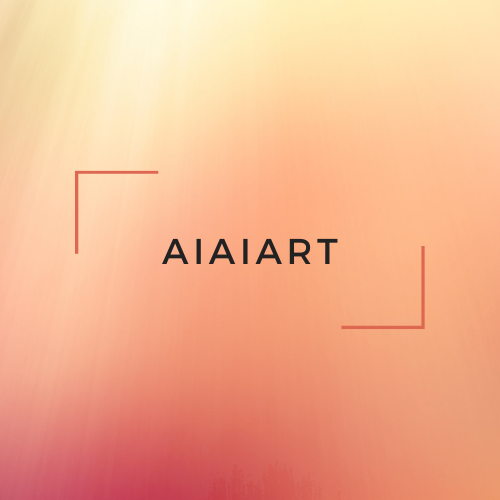

In [7]:
from PIL import Image

filename = 'logo.png'
img = Image.open(filename)
img # display the image : Jupyter supports easy display of images

We usually represent images as an array of pixels, each of which has a red,  
green and blue component (plus a transparency component in many cases). Let's  
convert our image to a numpy array and see how that data is organised:

In [23]:
img_array = np.array(img)
print(f'img_array.shape {img_array.shape}')

img_array.shape (500, 500, 4)


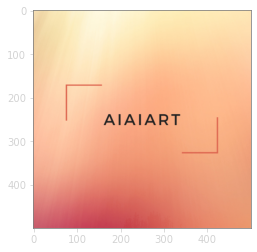

In [90]:
import matplotlib.pyplot as mpl
mpl.rcParams['figure.facecolor'] = 'none'
mpl.rcParams['axes.titlecolor'] = 'lightgrey'
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['xtick.color'] = 'lightgrey'
mpl.rcParams['ytick.color'] = 'lightgrey'
mpl.rcParams['axes.labelcolor'] = (1, 1, 1, 0.5)

plt.imshow(img_array) # matplotlib can display the images of RGB(A) channels

Converting to a tensor is easy since `torch.tensor` accepts numpy arrays as arguments:

In [25]:
img_tensor = torch.tensor(img_array)


This image has a shape corresponding to width x height x channels. However, many  
pytorch image operations expect the order to be channels x width x height.  
Permute to the rescue:

In [26]:
# permute from [width,height,channels[] to [channels,width,height]
# tensor.permute() is a useful method for rearranging the dimensions of a 
# PyTorch tensor to better suit your needs in computation and deep learning 
# contexts
# @note 🧠 :torch.permute() returned tensor is a VIEW OF the ORIGINAL tensor
# - this shares the SAME data, so ANY CHANGES to one will AFFECT the BOTH VIEWS
img_channels_permuted = img_tensor.permute(2,0,1)

# image array 
# - to tensor 
# - to chanels PERMUTED
print(f'-- [img_array.shape ] -- \n{img_array.shape}\n')
print(f'-- [img_tensor.shape] -- \n{img_tensor.shape}\n')
print(f'-- [img_channels_permuted.shape] -- \n{img_channels_permuted.shape}\n')

-- [img_array.shape ] -- 
(500, 500, 4)

-- [img_tensor.shape] -- 
torch.Size([500, 500, 4])

-- [img_channels_permuted.shape] -- 
torch.Size([4, 500, 500])



In this format we can access each channel individually:

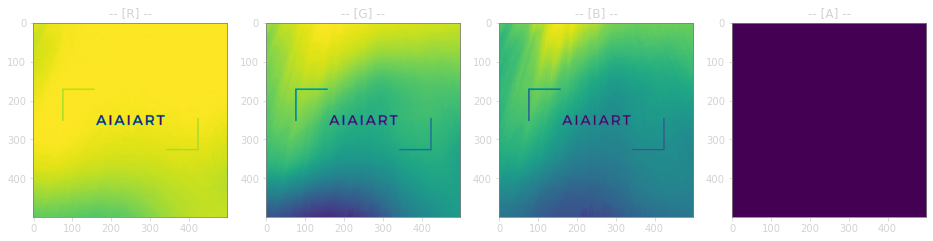

In [27]:
# Plotting each channel individually:
rgba = ['R','G','B','A']
fig, axs = plt.subplots(1,4, figsize=(16,4))
for i in range(4):
    axs[i].imshow(img_channels_permuted[i])
    axs[i].set_title(f'-- [{rgba[i]}] --')

One final thing to note: 

- not only do many PyTorch image operations expect channels x width x height, 
- they are also built around processing `BATCHES` of images, 
- so the final shape is `batch_size` x channels x width x height. 

When working with just `ONE` image we might need `.unsqueeze(0)` to create a BATCH of  
`size 1`

### Coding Exercise 4 : Image Operations

1) Drop the alpha channel to turn channels_first into an RGB image, and then use  
unsqueeze to make the shape [1, 3, WIDTH, HEIGHT]. Check this with .shape.  
2) Convert it back into the PIL/matplotlib format (w, h, c)  
3) Turn it back into a PIL Image (hint: Image.fromarray) and save it to a new file  
4) Use tensor indexing to 'crop' the center area of the image and display it  
5) See if you can swap some color channels around and visualize the result.  

In [28]:
# @audit : Your solution here
img_channels_rgb = img_channels_permuted.unsqueeze(0)
img_channels_rgb.shape

torch.Size([1, 4, 500, 500])

# Section 2 : Gradient Descent and Autograd

![skiing down a slope](https://media1.giphy.com/media/JrGH6KjBHJk38Y4nwm/giphy.gif)

Lets consider the following situation. Say we have:  

- A function (could be a neural net, could be the equation for a straight line...)  
that takes some `input(s)` and produces some `output(s)` based on a set of parameters -  
let's call them `w`.  
- Some measure of how well this function performs. Maybe this is how poorly the  
function describes some pattern in your data, or how well a network does in a  
classification task. Let's call this measure the `loss`, where the goal is to  
make this as `small as possible`.

The question is often 'how do we find a set of parameters that gives the best  
possible result?'. There are a few ways we could try to solve this. The most  
basic might be:  

- Try all possible values for all parameters  
- Randomly guess and keep the best  

Clearly both of these have some major flaws, and when we're dealing with   
thousands or millions of parameters there is no way you could try all possible   
combinations. So, we need a smarter approach.

## 2.1 The Gradient Descent Algorithm

What if we could start from some set of parameters, and then see how to modify   
them slightly such that we get an improvement? Ideally, for each parameter we'd   
like to know what happens to the loss when we tweak that parameter slightly up   
or down.  

Formally, we'd like to know the **gradient of the loss with respect to that parameter**.  
You can think of the gradient as telling us which direction to move  to get the   
biggest increase (or decrease if we go in the opposite direction).  

IF we can find these gradients, then a sensible method for finding a good set of  
parameters to solve a given problem would be  

1) Start with some `random` parameters  
2) Find the gradient of the `loss` with respect to each `parameter`  
3) `Update` each `parameter` such that you move some small amount in the direction  
of steepest descent  
4) Go back to step 2, finding the gradients based on the new parameter values  
and repeat all this a bunch of times.  

This is the gradient descent algorithm in a nutshell :) Let's do an example,  
where we'll create some data that roughtly follows a trend and try to approximate  
that trend with a straight line, which will be specified by two parameters.

## 2.2 Creating an Example Problem

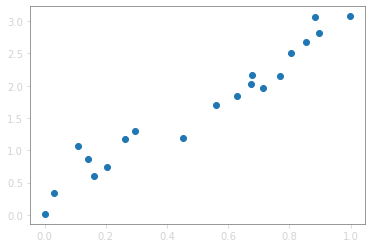

In [29]:
# Creating some data
x = torch.rand(20)
# y = ax + b + noise
y = 3*x + 0.2 + torch.randn(20)*0.3
# it's always helpful to visualize what's going on when possible
plt.scatter(x,y)


## 2.3 Defining our Loss
We can describe a line as a function y = ax + b where a and b are our parameters.  
Let's graph our 2 lines

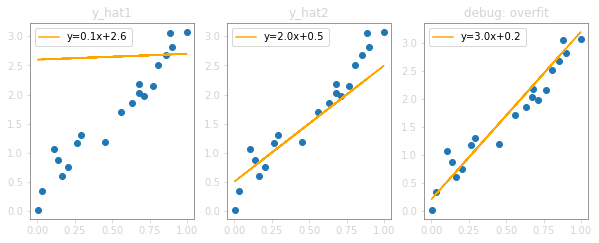

In [40]:
#@title Comparing Lines
fig, axs = plt.subplots(1,3, figsize=(10, 3.6))

axs[0].set_title('y_hat1')
axs[0].scatter(x,y)
# y_hat1 : randomly guessing a=0.1 and b=2.6
axs[0].plot(x, 0.1*x + 2.6, label='y=0.1x+2.6', c='orange')
axs[0].legend()

axs[1].set_title('y_hat2')
axs[1].scatter(x,y)
# y_hat2 : randomly guessing a=2.0 and b=0.5
axs[1].plot(x, 2.0*x + 0.5, label='y=2.0x+0.5', c='orange')
axs[1].legend()

axs[2].set_title('debug: overfit')
axs[2].scatter(x,y)
# @audit 📊 : DEBUG overfit plugging in [y = ax + b + noise] where a=3.0 and b=0.2
axs[2].plot(x, 3.0*x + 0.2, label='y=3.0x+0.2', c='orange')
axs[2].legend()

Clearly one does a better job than the other at describing the trend in this data.  
But how do we quantify this?  

There are several measures used in this sort of case,  with a popular one being  
the `Root Mean Squared Error`. 

It sounds intimidating, but all we do is :  

1) take the `errors` (how far each point is from the line) 
2) `square` them 
3) `sum` the squares 
4) and then take the `square root` of that

More points `further from the line -> higher errors` (squaring takes care of any  
minus signs that would otherwise cause issues with points above/below the  
line) -> a higher final value for the RMSE.  

So lower is better. This is our loss function.  

Here's one way to implement this in code (there are also built-in functions for  
this and many other ways you could write it):

In [31]:
def rmse(y, y_hat):
    return torch.mean((y-y_hat)**2)**0.5

# using this loss funtion we can quantify how well the lines match the data
y_hat1 = 0.1*x + 2.6
y_hat2 = 2.0*x + 0.5
# @audit 🖶 : the line that has a lower RMSE is a BETTER fit
print(f'RMSE for y_hat1 = 0.1*x + 2.6 => {rmse(y, y_hat1)}')
print(f'RMSE for y_hat2 = 2.0*x + 0.5 => {rmse(y, y_hat2)}')

RMSE for y_hat1 = 0.1*x + 2.6 => 1.3065696954727173
RMSE for y_hat2 = 2.0*x + 0.5 => 0.3461126387119293


`-- [Interactive] --` : Try out different values and see how close you can get

In [8]:
import ipywidgets as widgets
from IPython.display import display, HTML

slope = widgets.FloatSlider(min=0, max=5, value=1)
offset = widgets.FloatSlider(min=-1, max=1, value=0)

def get_rmse(slope, offset):
    y_hat = slope*x + offset
    print(f'RMSE for y_hat = {slope:1.2}*x + {offset:1.2} => {rmse(y, y_hat):1.3}')
    # @audit-ok 🔎 : figure out how to display the plot with a nice alpha background
    fig, ax = plt.subplots()
    ax.set_facecolor('lightgrey')
    ax.scatter(x,y)
    ax.plot(x, y_hat, c='orange', label=f'y={slope}*x+{offset}')
    ax.legend()

# Create a container with a custom background color
container = widgets.Box([slope, offset])
container.layout.border = '0px solid black' # type: ignore
container.layout.padding = '0px' # type: ignore

# Change the background color of the container using custom CSS
display(HTML("""
<style>
.custom-container {
    background-color: rgba(1, 1, 1, 0.85);
}
</style>
"""))

# Display your widgets and interactive plot with the custom background color
container_with_style = widgets.VBox([container], layout=widgets.Layout(display='flex'))
container_with_style.add_class('custom-container')
widgets_output = widgets.interactive_output(get_rmse, {'slope': slope, 'offset': offset})
widgets_output.add_class('custom-container')
display(container_with_style, widgets_output)

# out = widgets.interactive_output(get_rmse, {'slope':slope, 'offset':offset})
# display(slope, offset, out)

Output(_dom_classes=('custom-container',))

**THINK/DISCUSS**: What is your thought process as you play with the sliders?  
Are you doing something like the gradient descent described earlier?

ANSWER : it's interesting that with the interactive slider you can guess your  
way to original best fit :
- [y = ax + b + noise] where a=3.0 and b=0.2

## 2.4 Calculating Gradients

So, how do we find the gradients we keep talking about? If you're good at  
differentiation, you can look at a function and figure them out analytically.  

But this quickly breaks down when the function is complex or involves many steps.  

Fortunately, PyTorch does something called automatic differentiation, where it  
can keep track of every operation that happens to a tensor.  

It builds something called a computational graph, and when you want to calculate  
the gradients with respect to some final result you can simply call `.backward()`  
and PyTorch will trace the path back through this graph filling in the gradients  
at each step. 

We won't go too deep into this, but here's a simple example:

In [33]:
# Some operations to demonstrate autograd
a = torch.tensor(5.7)
# @note 🧠 : important to set this to TRUE, because that's NOT the DEFAULT
a.requires_grad = True
b = 5*a+2
c = torch.sin(2*b+0.1)
c

tensor(-0.9871, grad_fn=<SinBackward0>)

Notice that `grad_fn` bit there? Because : 

- c depends on something [torch.sin(2*b+0.1)]
- (b) that depends  [5*a+2]
- on a tensor that requires_grad (a), 

PyTorch keeps track of the function needed to calculate the gradients. 

We could then see the gradient of c with respect to a with:

In [34]:
# Tell pytorch to propagate the gradients back through the computation graph
c.backward()
a.grad # the gradient of c with respect to a

tensor(-1.6036)

The derivative of : 

- c with respect to a is (10*cos(10*(a+0.41)) - plugging in a=5.7 
- we see that this does indeed give the answer dc/da = -1.603. 

@audit 🛑 : This is quite `magical` - we can chain complex functions together  
and as long as eveything is differentiable we can rely on PyTorch to be able to  
work backwards and give us all the gradients we need.

## 2.5 Gradient Descent and our Toy Example

Let's get back to that example we were playing with, trying to find the parameters  
for a line that best describes the trend in our data.

We create our parameters `w` (initialized to 2 random floats) and tell pytorch  
to keep track of gradients.

Then : 

- in a `loop` 
- we repeatedly `find the loss` 
- `find the gradients` (loss.backward()) 
- and update the parameters accordingly. 

We could do this ourselves but PyTorch provides an optimizer that handles the  
update for us - `torch.optim.SGD`. 

The learning rate `lr` determines how small of a `step` we take at each `iteration`.

Once the loop has finished running, we plot the losses and see that we are indeed  
getting better and better over time.

Instead of `optimizer.step()`, we could do `w -= w.grad * 0.2` where `0.2` is  
the learning rate and the `minus` sign is because we want to move in the direction  
that `reduces los`s (so opposite to the steepest gradient).

-- [i=0] -- 
loss = 1.4099087715148926
-- [i=20] -- 
loss = 0.48411646485328674
-- [i=40] -- 
loss = 0.27660319209098816
-- [i=60] -- 
loss = 0.21465665102005005
-- [i=80] -- 
loss = 0.21012826263904572

-- [w] -- # View the learned parameter vs [y = ax + b + noise] where a=3.0 and b=0.2 
tensor([2.7125, 0.2934], requires_grad=True)

-- [w.grad] -- # Gradient of loss wrt to [w] (tiny=close to optimal) 
tensor([-0.0025,  0.0014])


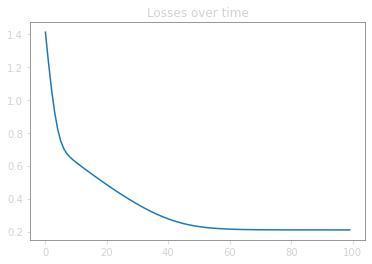

In [35]:
w = torch.rand(2) # our parameeters
w.requires_grad = True # we want to track gradients

# SGD = Stochastic Gradient Descent
# @note 🧠 : too bad we aren't using a LEARNER, and can't use learn.lr_find()
optimizer = torch.optim.SGD([w], lr=0.2) # inlining learning rate to 0.2

losses = [] # keep track of the losses (RMSE values)
ws = [] # keep track of the values predicted by the model

for i in range(100):
    # Reset everything related to the gradient calculation
    optimizer.zero_grad()

    # Get our outputs
    y_hat = w[0]*x + w[1]

    # Calculate the loss
    loss = rmse(y, y_hat)

    # Store the loss for later
    losses.append(loss.detach().item())
    ws.append(w.clone().detach().numpy())

    # Print out updates every few iterations
    if i % 20 == 0:
        print(f'-- [i={i}] -- \nloss = {loss}')

    # Backpropagate the loss and use it to update the parameters
    loss.backward() # This does all the gradient calculations
    # @note 🧠 : Instead of `optimizer.step()`, we could do `w -= w.grad * 0.2` where `0.2` 
    # is the learning rate and the `minus` sign is because we want to move in 
    # the direction that `reduces los`s (so opposite to the steepest gradient).
    optimizer.step() # This updates the parameters

plt.plot(losses)
plt.title('Losses over time')

print(f'\n-- [w] -- # View the learned parameter vs [y = ax + b + noise] where a=3.0 and b=0.2 \n{w}')
print(f'\n-- [w.grad] -- # Gradient of loss wrt to [w] (tiny=close to optimal) \n{w.grad}')

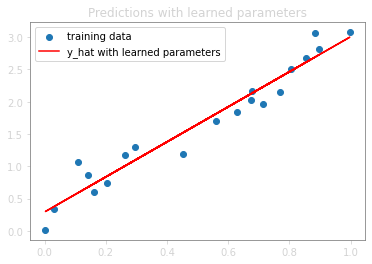

In [39]:
# Plot predictions with these parameters
plt.title('Predictions with learned parameters')
plt.scatter(x,y, label='training data')
y_hat = w[0]*x + w[1]
plt.plot(x, y_hat.detach(), c='red', label='y_hat with learned parameters')
plt.legend()

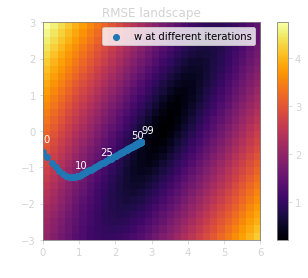

In [123]:
#@title Show the loss landscape and our path through it
grid_x = torch.arange(0, 6, 0.2)
grid_y = torch.arange(-3, 3, 0.2)


# return two 2D tensors X and Y, where X contains the repeated values of x along 
# its rows, and Y contains the repeated values of y along its columns
w1, w2 = torch.meshgrid(grid_x, grid_y)

# @audit-ok 🔎 : Explain why w1.shape is used for width and height instead of w2.shape
width, height = w1.shape

# expand(width, height, -1) = tensor of shape (30, 30, 20) where :
#  - [2] = 20 because idx -1 => torch.Size([1, 20]) 
#  - the third dimension has the same size as the size of the last dimension of 
#    the tensor being expanded
#  - @audit 🛑 : Is unsequeeze(0) needed?
x_expand = x.unsqueeze(0).expand(width * height, -1)
y_expand = y.unsqueeze(0).expand(width * height, -1)

w1_expand = w1.flatten().unsqueeze(0).expand(20, -1)
w2_expand =  w2.flatten().unsqueeze(0).expand(20, -1)

# Calculating y_hat for each set of parameters and then the resulting RMSEs
yhats = x_expand * w1_expand.T + w2_expand.T
rmses = torch.mean((y_expand-yhats)**2, dim=1)**0.5

# Showing the loss landscape
plt.imshow(rmses.reshape(width, height), cmap='inferno', extent=[0, 6, -3, 3])
plt.colorbar()
plt.title('RMSE landscape')
plt.xlabel('w[0] (gradient/slope)')
plt.ylabel('w[1] (offset)')

# Showing the path we took over time
# we need x, -y because the image is flipped
plt.scatter([w[0] for w in ws], [-w[1] for w in ws], label='w at different iterations')
for i in [0, 10, 25, 50, 99]:
    plt.annotate(i, (ws[i][0], -(ws[i][1])+0.25), c='white') # type: ignore
plt.legend()
plt.show()

-- [Debug Print] --

In [76]:
print(f'--[grid_x] -- grid_x.shape = {grid_x.shape}')
# print(f'{grid_x}\n')
print(f'--[grid_y] -- grid_y.shape = {grid_x.shape}')
# print(f'{grid_y}\n')

print(f'\n--[torch.meshgrid(grid_x, grid_y)] --\nw1.shape = {w1.shape} \nw2.shape = {w2.shape}\n')
# print(f'--[w1] -- w1.shape = {w1.shape}\n{w1}')
# print(f'--[w2] -- w2.shape = {w2.shape}\n{w2}')

print(f'\n--[torch.meshgrid(grid_x, grid_y)] --\nw1.shape = {w1.shape} \nw2.shape = {w2.shape}\n')
# print(f'--[w1] -- w1.shape = {w1.shape}\n{w1}')
# print(f'--[w2] -- w2.shape = {w2.shape}\n{w2}')

print(f'{x.shape}         --[x] --')
# print(f'{x}\n')
print(f'{x.unsqueeze(0).shape}      --[x_unsqueeze(0)] --')
# print(f'{x.unsqueeze(0)}\n')
print(f'{x_expand.shape}    --[x_unsqueeze(0).expand(width, height, -1)] --')
# print(f'{x_expand}\n')
print(f'{w1_expand.shape}    --[w1_expand] --')
print(f'{w1_expand.T.shape}    --[w1_expand.T] --')
# print(f'w1_expand {w1_expand}\n')
# print(f'w1_expand.T {w1_expand.T}\n')

--[grid_x] -- grid_x.shape = torch.Size([30])
--[grid_y] -- grid_y.shape = torch.Size([30])

--[torch.meshgrid(grid_x, grid_y)] --
w1.shape = torch.Size([30, 30]) 
w2.shape = torch.Size([30, 30])


--[torch.meshgrid(grid_x, grid_y)] --
w1.shape = torch.Size([30, 30]) 
w2.shape = torch.Size([30, 30])

torch.Size([20])         --[x] --
torch.Size([1, 20])      --[x_unsqueeze(0)] --
torch.Size([900, 20])    --[x_unsqueeze(0).expand(width, height, -1)] --
torch.Size([20, 900])    --[w1_expand] --
torch.Size([900, 20])    --[w1_expand.T] --


**THINK/DISCUSS:** 
- Does this make sense? 

- Are there any issues? 

- What happens when the gradients are small? 

- What happens when our step size (learning rate) is too high?

**THINK/DISCUSS**: 

- What kinds of problems can we solve with this tool? 

- Can you think of examples? 

- What are the limitations?

# Section 3: Ethics - What are we optimizing for?

Choosing a loss function might seem like a fairly mundane and technical questions,  
but the choice of what we're optimizing for can have real-world impacts.  

What situations have you seen or experienced when the wrong target was picked?

# Conclusions

**THINK/DISCUSS** What have we just learnt?

Phew - that was quite a lot to cover! Congratulations on making it through.  
Some of today's content may have felt 'basic', some may seem completely confusing  
and beyond you.  

Don't worry - as we move forward in this course we'll keep building on this  
foundation but also repeating the important concepts again and again.  

You can always refer back here or ask questions in the Discord if something  
still hasn't clicked.

# BONUS 1: Optimizing RGB Images with CLIP

What, you thought we were going to end today without making any pretty pictures? 

Think again!

We'll look at CLIP in more detail in future lessons, but for now here's a basic sumary: 

- CLIP is a model built by OpenAI for connecting text and images. 
- It was trained on a dataset consisting of images with captions. 
- By mapping both image and text to a single space, it enables comparison between  
these different data modalities.  
- Images that are similar to other images are close together in the representational  
space of CLIP, and so are images and text that are similar. 

You can read about it here: https://openai.com/blog/clip/

What this means for us is that we can use CLIP to compare an image that we  
generate with a text prompt.  
And since the entire pipeline is differentiable, we can then calculate the  
gradient of that loss and find out how to tweak our image to move it 'closer' to  
the text.  

In this example we'll start with random noise and optimize the raw pixel  
values - later in the course we'll explore some fancier ways of generating imagery.

### Setup For Clip

In [124]:
print("Downloading CLIP and installing requirements")
'''
Downloading CLIP and installing requirements
Cloning into 'CLIP'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 243 (delta 2), reused 1 (delta 0), pack-reused 236
Receiving objects: 100% (243/243), 8.92 MiB | 1.76 MiB/s, done.
Resolving deltas: 100% (122/122), done.
'''
!git clone https://github.com/openai/CLIP
''' 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.14.0.dev20221022 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
'''
%pip install -q  ftfy regex tqdm omegaconf pytorch-lightning

Cloning into 'CLIP'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 243 (delta 2), reused 1 (delta 0), pack-reused 236
Receiving objects: 100% (243/243), 8.92 MiB | 1.76 MiB/s, done.
Resolving deltas: 100% (122/122), done.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.14.0.dev20221022 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch

print(torch.__version__)
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available()) # type: ignore
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built()) # type: ignore

1.14.0.dev20221022
True
True


### Using CLIP as a loss function

We're going to load in a CLIP model and use it to encode both an image and some text:

In [14]:
from CLIP import clip
# useful image transforms
from torchvision import transforms
# progress bars library
from tqdm.notebook import tqdm

# load in one of the models from CLIP
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
''' 
This line of code is used to load a pre-trained CLIP model and prepare it for 
inference. CLIP is a powerful deep learning model developed by OpenAI for 
zero-shot image and text classification. The model used in this case is 
'ViT-B/32', which is a Vision Transformer model with a base configuration.

Let's break down the code step by step:
1. `clip.load('ViT-B/32', jit=False)`: This function loads the pre-trained CLIP 
model 'ViT-B/32' with Just-In-Time (JIT) compilation disabled (`jit=False`). 
Disabling JIT compilation makes the model more flexible, but it may be slower 
during inference. The function returns a tuple containing the model and the 
pre-processing function.
2. `[0]`: This extracts the model from the tuple returned by the `clip.load()` 
function.
3. `.eval()`: This sets the model to evaluation mode, which is necessary for 
running inference. In evaluation mode, certain layers like Dropout and BatchNorm 
behave differently than during training.
4. `.requires_grad_(False)`: This disables gradient computation for the model's 
parameters. This is useful when you only want to use the model for inference and 
not for training, as it saves memory and improves performance.
5. `.to(device)`: This moves the model to the specified device (e.g., CPU or GPU). 
The `device` variable should be defined earlier in your code, typically with a 
line like `device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`.

After executing this line of code, the variable `perceptor` will hold the CLIP 
model that is ready for inference on the specified device, with gradient 
computation disabled.

You can now use the `perceptor` model to perform zero-shot classification tasks 
by encoding both images and text and computing the similarity between the 
encodings.
'''
perceptor = clip.load('ViT-B/32', jit=False)[0].eval().requires_grad_(False).to(device)
print(f'perceptor.visual.input_resolution = {perceptor.visual.input_resolution}')

perceptor.visual.input_resolution = 224


Encoding Text

In [10]:
# Embed some text
prompt_string = 'A watercolor painting of the sunset over a mountain range'
text_embed = perceptor.encode_text(clip.tokenize(prompt_string)).to(device)
text_embed.shape

torch.Size([1, 512])

**Encoding an image:**

The input image tensor has a shape of `torch.Size([1, 3, 224, 224])`, which  
represents a batch of 1 image (B) with 3 color channels (C) and dimensions of  
224x224 pixels (HxW). 

When the image is passed through the CLIP model's `encode_image()` method, it  
gets transformed into an embedding with a shape of `torch.Size([1, 512])`. 

This transformation happens through several layers of the CLIP model's architecture.

Here's a high-level overview of how the transformation occurs in the CLIP model  
(using the 'ViT-B/32' variant):

1. **Input Image**: The input image tensor has a shape of `[1, 3, 224, 224]`,  
representing a batch of 1 image with 3 color channels and dimensions of 224x224 pixels.

2. **Normalization**: The `normalize` function is applied to the image, which  
normalizes each color channel using the provided mean and standard deviation values.

3. **Vision Transformer**: The normalized image is passed through the  
Vision Transformer (ViT) architecture. ViT divides the image into non-overlapping  
patches, flattens them, and feeds them into the transformer layers. In the case  
of 'ViT-B/32', the image is divided into 32x32 pixel patches.  
The transformer layers process these patches and create feature representations  
for each patch.  
The final output of the ViT layers is a sequence of feature vectors, including a  
special "classification token" that has a global understanding of the image content.

4. **Pooling**: The classification token is extracted from the output of the ViT layers.  
This token is a vector representation that captures the global features of the image.  
Its shape is `[1, 768]`.

5. **Projection Head**: The classification token is passed through a linear  
projection layer, which reduces its dimensionality to 512.  
This final embedding has a shape of `[1, 512]`.

The result is an image embedding with a shape of `torch.Size([1, 512])`.  
This embedding can be compared to text embeddings produced by the CLIP model to  
perform zero-shot classification tasks.

Regarding the question of whether this works with different image sizes:  
- The 'ViT-B/32' model expects input images of size 224x224 pixels.  
- If you provide images with different dimensions, the model may not work as  
expected, and the performance could be affected. 
- You can resize the input images to 224x224 pixels using the  
`torchvision.transforms.Resize` function before passing them through the model.

In [13]:
# Create a random image
# 1 image, 3 channels, 224x224 pixels
# does this work with different sizes?
img = torch.rand(1, 3, 224, 224)
print(f'-- [img.shape] -- \n{img.shape}')
# img_pil = transforms.ToPILImage(img.squeeze(0))

# Create a transform - map image data to same range as seen by CLIP during training
# @audit 🛑 : Explain these mean and std magic numbers
# ANSWER :
# These specific values were computed from the dataset used to train the model 
# and represent the average pixel value for each channel
# I STILL DON'T UNDERSTAND THIS LOL
mean = [0.48145466, 0.4578275, 0.40821073] # used to center the data for each channel
std = [0.26862954, 0.26130258, 0.27577711] # used to scale the data for each channel
normalize = transforms.Normalize(mean=mean, std=std)

# Embed the image
image_embed = perceptor.encode_image(normalize(img)).to(device)
print(f'-- [image_embed.shape] --\n{image_embed.shape}')

-- [img.shape] -- 
torch.Size([1, 3, 224, 224])
-- [image_embed.shape] --
torch.Size([1, 512])


Now that we have a representation of both the text and the image in the same  
`space`, we need some way to compare them. For this first test, let's re-use an  
idea from earlier and calculate a sort of `Root-Mean-Squared-Difference`:

In [15]:
def clip_loss_basic(img, text_embed):
    img_embed = perceptor.encode_image(normalize(img)).to(device)
    # Root mean squared error
    loss = torch.mean((img_embed - text_embed)**2)**0.5
    return loss

# Some measure of how closely our image matches the text propmt hopefully
clip_loss_basic(img, text_embed)

tensor(0.4564)

Now, compare our situation to the gradient descent example. We have some  
parameters to optimize (in this case, the raw pixel data of an image) and we  
have a way to measure loss (our clip_loss_basic function). Can we just use the  
same optimization loop as before? Let's try it and see!

  0%|          | 0/200 [00:00<?, ?it/s]

[  0] loss = 0.48443683981895447
[ 50] loss = 0.23240505158901215
[100] loss = 0.2010270655155182
[150] loss = 0.1882067173719406


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


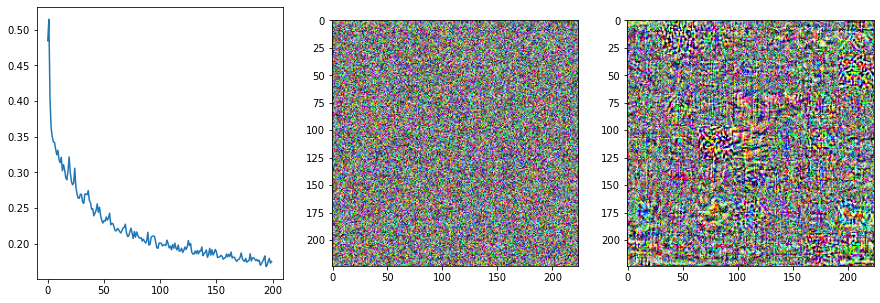

In [16]:
# The target text
prompt_string = 'A watercolor painting of the sunset over a mountain range'
text_embed = perceptor.encode_text(clip.tokenize(prompt_string)).to(device)

# The 'ViT-B/32' model expects input images of size 224x224 pixels
model_w = model_h = 224 # 
# the image we want to optimize
img = torch.rand(1, 3, model_w, model_h)
img.requires_grad = True

# cache the initial image that is disconnected from the computation graph
# - .detach() => a new tensor but without any connection to the computation graph
#   useful when you want don't need to keep track of gradients or any information 
#   related to backpropagation
img_start = img.detach().clone()

# the optimizer
# @audit-ok ☑ : Explain if [img] == Gradient Descent (stochastic == batches > 1)
# ANSWER :
# While it's true that using a batch size of 1 is different from Stochastic 
# Gradient Descent (which uses batches larger than 1) : 
# - it is NOT the same as Gradient Descent. 
# - When the batch size is 1, the optimization process is known as 
#   **Online Gradient Descent** or **Incremental Gradient Descent**.
# - Online/Incremental GD can be more susceptible to noise and oscillations since 
#   the gradient estimation is based on individual data points.
# - In summary, the main difference between Gradient Descent and 
#   Online Gradient Descent is how they process the data to update the 
#   model parameters. 
#   Gradient Descent uses the entire dataset for each update, providing a more 
#   accurate estimation of the gradient but can be computationally expensive. 
#   Online Gradient Descent processes one data point at a time, allowing for 
#   faster updates but potentially with more noise and oscillation in the 
#   optimization process.
optimizer = torch.optim.SGD([img], lr=500)
# Keep track of the losses (RMSE values)
losses = []

for i in tqdm(range(200)):
    # reset the gradients of all the parameters managed by the optimizer to zero 
    # before the next iteration of the training loop : 
    # - ensures that the gradients calculated in the current iteration 
    # - do not affect the gradients calculated in future iterations
    # - allowing the model to learn correctly from the data.
    optimizer.zero_grad()

    # calculate our loss
    loss = clip_loss_basic(img, text_embed)

    # store the loss
    losses.append(loss.detach().item())
    if i % 50 == 0:
        print(f'[{i:3}] loss = {loss}')

    # backpropagate the loss, and use it to update the parameters
    loss.backward() # calculate the gradients
    optimizer.step() # update the parameters

# visualize the results
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].plot(losses)
# reshaping from torch.Size([1, 3, 224, 224]) to :
# - squeeze(0) => torch.Size([3, 224, 224])
# - permute(1,2,0) => torch.Size([224, 224, 3])
# because imshow expects a tensor of shape (H, W, C)
axs[1].imshow(img_start.squeeze(0).permute(1,2,0))
axs[2].imshow(img.squeeze(0).detach().permute(1,2,0))

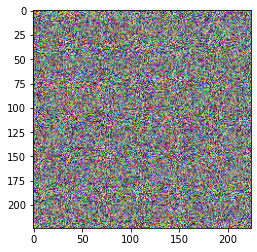

In [17]:
img_start.squeeze(0).permute(1,2,0).shape
# img_start.squeeze(0).shape
img_start.squeeze(0).permute(1,2,0)
plt.imshow(img_start.squeeze(0).permute(1,2,0))


Hmm... that's not great! You can try different learning rates and fiddle with  
some other things, but there are a few big issues here. TO highlight one of them,  
let's look at what has changed by comparing our generated image to the starting  
image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


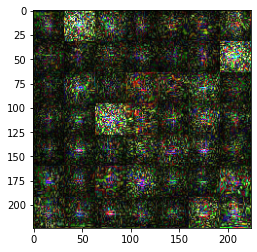

In [18]:
# absolute difference between starting and ending images
plt.imshow(torch.abs(img.detach()-img_start).squeeze(0).permute(1,2,0))

#### Woah - what's going on here?
- Clipping input data to the valid range for imshow with `RGB data`... tells us  
that some `values in our image are > 1`, which is not ideal
- `RMSE` is not a great measure for comparing things high-dimensional spaces.  
Neither is a raw 'distace' calculation.
- The `CLIP model` we're using here is based on a `Vision Transformer`, which works  
with `image patches`. You can see the patches in the difference image above -  
since each patch is seeing the same pixels all the time, those pixels can go  
crazy getting just the right output for that patch.
- That learning rate might be a little high - you can try it lower or play with 
optmiizing for more iterations.

So, how do we fix all of this? Here's a few improvements we can make:

Improvements:

- Changing our loss to something called the `Great Circle Distance Squared`
- Applying some transforms to the image before feeding it to CLIP, such that  
the model sees a slightly different version of the image each time
- Forcing the values to lie in the expected range for an image with im.clip(0, 1).

We can also make it easier to tweak parameters by turning this block of code  
into a form with some inputs that we can play with.  

Click 'Show code' to see how it's done.

## Take Two:


  0%|          | 0/200 [00:00<?, ?it/s]

[  0] loss = 0.9384341835975647
[ 50] loss = 0.7296432852745056
[100] loss = 0.7019578814506531
[150] loss = 0.704710841178894


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


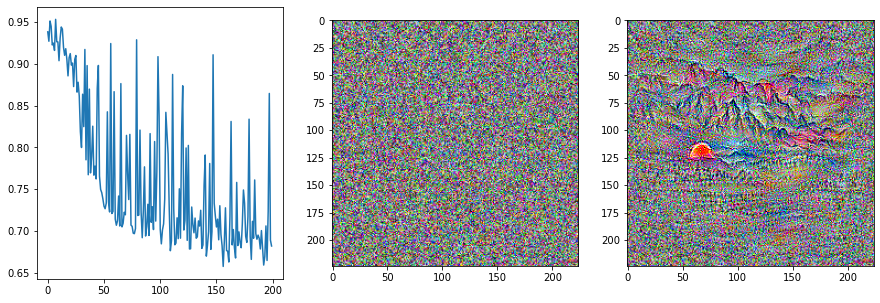

In [29]:
import torch.nn.functional as F

# Applying these random transformations, the model is exposed to a more DIVERSE 
# set of input images, so it can handle UNSEEN images better
tfms = transforms.Compose([
    # helps the model become more INVARIANT to SCALES and aspect RATIO of inputs
    transforms.RandomResizedCrop(224),
    # helps the model become more INVARIANT to ROTATIONS in inputs
    transforms.RandomAffine(5),
    # helps the model become more INVARIANT to COLOR in inputs
    transforms.ColorJitter(),
    #  help the model become more INVARIANT to NOISE and small DETAILS in inputs
    #  forcing it to learn more GLOBAL FEATURES.
    transforms.GaussianBlur(5)
])

# Our new and improved loss function
def clip_loss(img, text_embed):
    # 3) and then passes it through the `perceptor` (a CLIP model) to obtain 
    # the image embedding
    image_embed = perceptor.encode_image(
        tfms(img) # 1) preprocesses images using the `tfms` transformation
        .to(device) # 2) moves it to the appropriate device (e.g., GPU)
    ).float()

    # torch.Size([1, 3, 224, 224]) => torch.Size([1, 512])
    # normalizes the image embedding along dimension 2 : the FEATURE axis
    input_normed = F.normalize(image_embed.unsqueeze(1), dim=2)
    # torch.Size([1, 512]) => torch.Size([1, 1, 512])
    # normalizes the input text embedding along dimension 2
    embed_normed = F.normalize(text_embed.unsqueeze(0), dim=2)
    # Square Great Circle Distance
    # - computes the squared great circle distance between the normalized image 
    # and text embeddings
    # - done by calculating the angular distance on the unit hypersphere and 
    # squaring it
    # resulting `dists` tensor represents the squared great circle distance 
    # between the image and text embeddings. By minimizing this loss function 
    # during training, the model learns to generate image embeddings that are 
    # closer (more similar) to the corresponding text embeddings.
    dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
    return dists.mean()

# The target text as a parameter
prompt = 'A watercolor painting of the sunset over a mountain range'
text_embed = perceptor.encode_text(clip.tokenize(prompt).to(device)).float()

# The image we'll be optimizing
model_w = model_h = 224 # perceptor model was trained on 224x224 images
img = torch.rand(1, 3, model_w, model_h)
img.requires_grad = True

# Cache the starting image
img_start = img.detach().clone() # detach from the computation graph and clone

# The optimizer
learning_rate = 50 #@param {type:"slider", min:0, max:100, step:1}
n_iteration = 200 #@param {type:"slider", min:0, max:100, step:1}

optimizer = torch.optim.SGD([img], lr=learning_rate)
losses = [] # Keep track of the losses (RMSE values)

for i in tqdm(range(n_iteration)):
    # reset the gradients of all the parameters managed by the optimizer to zero
    optimizer.zero_grad()

    # calculate our loss
    # Clipping ensures that the pixel values stay within the valid range :
    # - prevents issues with out-of-range values during the loss computation
    # - clips the pixel values of the input image `img` to the range `[0, 1]`
    loss = clip_loss(img.clip(0,1), text_embed)

    # store the loss
    losses.append(loss.detach().item())
    if i % 50 == 0:
        print(f'[{i:3}] loss = {loss}')

    # backpropagate the loss and use it to update the parameters
    loss.backward() # calculate the gradients
    optimizer.step() # update the parameters

# Visualize the results
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(img_start.squeeze(0).permute(1,2,0))
axs[2].imshow(img.squeeze(0).detach().permute(1,2,0))

Better! Our loss looks noisy thanks to different transforms being applied each  
iteration - this isn't a bad thing, but to smooth this out we could run a number  
of differently-transformed images through in a batch - and indeed this is what  
many implementations do.

**THINK/DISCUSS:** Read the code - does it make sense?  
By playing with the parameters can you get something looking really nice?

**Further Improvements**

You should now know enough to take a peek at my RGB optimization notebook: 

https://colab.research.google.com/drive/1MCC2IwAaRNCTBUzghuG41ypAkxjJvGtq?usp=sharing  

(There is also a user-friendly demo version here:  

https://colab.research.google.com/drive/1dBPXIspuMocqfcJqfjCn_PFeUfr36KGu?usp=sharing)

It builds on what we've seen here, but instead of just optimizing a large 224px  
image it creates a stack of images of different sizes which are combined into  
the final image.  

This results in much faster generation since a change to a pixel in one of the  
smaller images can affect a much larger area in the final image, so changes can  
happen more quickly. 

If you dig through that code you'll also see some different approaches to image  
augmentation/transformations, using multipe crops of the image to calcualte the  
loss and a nicer progress indicator that shows the image as it is being generated.

Have fun and share what you make in the Discord!

# BONUS 2: Different Optimizers and Regularization

Gradient Descent (or Stochastic Gradient Descent, which is just GD on batches of  
data rather than the full dataset) is just one optimization method.  

There are many improvements that can be made. If you're interested, here is a  
great rundown of the many alternatives that are used today: 

https://ruder.io/optimizing-gradient-descent/

One useful idea that is bundled with optimizers in PyTorch is that of  
regularization. It's a large topic, but in essence regularization is concerned  
with smoothing things out and simplifying models or parameter sets by avoiding  
any values that are too extreme.  

This usually applies to deep networks where extreme values can cause issues, but  
even in our case here where we're working with pixel data it can help avoid  
cases where the pixel values are higher than they need to be.

Let's try a different optimizer and introduce some regularization via the  
weight_decay parameter:

  0%|          | 0/100 [00:00<?, ?it/s]

[  0] loss = 0.9234828352928162
[ 20] loss = 0.7325910925865173
[ 40] loss = 0.7708273530006409
[ 60] loss = 0.6965981721878052
[ 80] loss = 0.7151000499725342


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


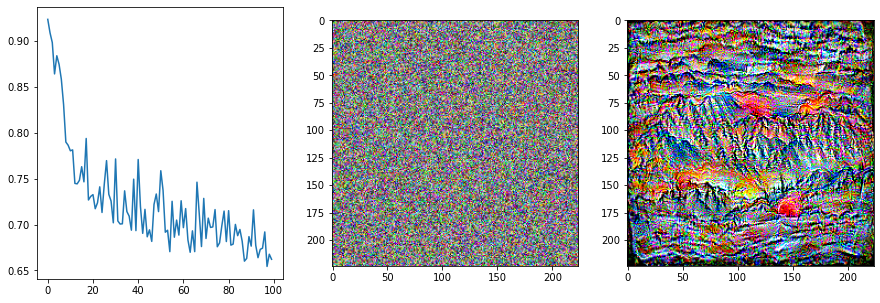

In [36]:
from torch import Tensor

# The image we'll be optimizing
model_w = model_h = 224 # perceptor model was trained on 224x224 images
img = torch.rand(1, 3, model_w, model_h)
img.requires_grad = True

# Detach and clone the initial image
img_start = img.detach().clone()

# The optimizer, feel free to try different ones here
losses = [] # Keep track of the losses (RMSE values)
# Adam class is an optimization algorithm provided by the PyTorch library 
# It's a popular choice for many deep learning tasks because of : 
# - its adaptive learning rate 
# - and efficient handling of sparse gradients
optimizer = torch.optim.Adam([img], lr=0.05, weight_decay=1e-6)

for i in tqdm(range(100)):
    # reset everything related to the gradient calculations
    optimizer.zero_grad()

    # calculate our loss across several different random crops
    loss: Tensor = 0
    n_crops = 4
    for _ in range(n_crops):
        loss += clip_loss(img.clip(0,1), text_embed)/n_crops

    # store the loss
    losses.append(loss.detach().item())
    if i % 20 == 0:
        print(f'[{i:3}] loss = {loss}')

    # backpropagate the loss and use it to update the parameters
    # @audit-ok ☑ : Explain why I had to type: ignore here
    # ANSWER : explicitly type hint the loss variable
    # - loss: Tensor = 0
    # - from torch import Tensor (also make sure to import Tensor)
    loss.backward() # calculate the gradients
    optimizer.step() # update the parameters

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(img_start.squeeze().permute(1,2,0))
axs[2].imshow(img.detach().squeeze().permute(1,2,0))

The choice of `optimizer` and learning `parameters` can have a drastic `effect`  
on what your `output` looks like. 

- Using a `larger value` for `weight_decay` might `desaturate` your image. 
- Picking a `learning rate` that is too `low` or too `high` might result in very 
`long training times` or `unstable results`

The field of deep learning is vey `emperical` - although there are some bits of  
theory we can use to predict what will happen, the best approach in many cases  
is just to `try different things and see what works`!

***
#### explain `derivatives` like I’m 11 years old
***

Well, have you heard of slopes? When you graph a line, the slope tells you how  
steep it is. 

A `derivative` is kind of like finding : 
- the `slope` of a `curve` 
- instead of just a `line`  

It's a way to figure out how quickly something is changing at any given point. 

For example, imagine you're riding your bike and you start going faster and faster.  
The `derivative` would tell you exactly how much your `speed` is `increasing` at  
each `moment`. 

`Derivatives` are really useful in all kinds of math and science, especially when  
we're studying how things `change over time`.

***
#### explain `chain rule` like I’m 11 years old
***

Okay! Imagine you're going on a trip with your family. You're starting from your  
home and going to a fun amusement park. To get there : 

- you first ride in a `car` to the train `station` 
- then take the `train` to the bus `station`  
- and finally, ride a `bus` to the amusement `park`.

Now, let's say your parents want to figure out :

- how much `time` it would take to `reach` the amusement `park`
- if they `drove` a bit `faster`. 

To do that, they need to understand how :

- changing the `car's speed` 
- `affects the total time` of the trip.

The chain rule is a math concept that helps us break down a problem like this  
into smaller parts. It's like figuring out how : 

- changing the car's speed affects the time it takes to reach the train station 
- then how that change affects the time it takes to reach the bus station 
- and finally, how it affects the time it takes to reach the amusement park.

In our trip example, the chain rule would help us understand the connection  
between : 
- the car's speed and the total trip time 
- by looking at each part of the journey separately. 

We would first see how :

- the car's speed affects the time it takes to get to the train station 
- Then, we would see how the time it takes to get to the train station affects  
the time it takes to get to the bus station.  
- Finally, we would see how the time it takes to get to the bus station affects  
the time it takes to get to the amusement park. 

By understanding these connections, we can figure out how the car's speed  
affects the total trip time.

So, the chain rule is like a helpful tool that :

- lets us break down a big problem into smaller parts 
- making it easier to understand how one thing affects another

In math, it helps us find the derivative (or rate of change) of a function  
that's made up of other functions, just like our trip example!

***
#### explain `back propagation` like I’m 11 years old
***

Alright! Imagine you're playing a game with your friends where you have to pass  
a small ball through a series of connected tubes. Each tube is attached to a  
small box that can change the direction of the ball. Your goal is to get the  
ball from the start to the end as quickly as possible. To do this, you need to  
adjust the boxes in the right way.

Backpropagation is a method used to teach a neural network, which is like a  
fancy computer program, to get better at solving problems. A neural network is  
made up of layers, and each layer is like a box in our tube game. The boxes in  
the neural network are called neurons, and they pass information between each  
other, like the ball in the game.

When the neural network makes a prediction, it's like sending the ball through  
the tubes from the start to the end. At the end, we can check how good the  
prediction is by comparing it to the correct answer. This is like checking if  
the ball reached the end as quickly as possible.

Now, we want to adjust the boxes (neurons) to make the neural network better at  
predicting. To do this, we use backpropagation. It's like going backwards  
through the tubes and adjusting each box one by one to make the ball go faster.  
We start at the end and work our way back to the beginning, making small  
adjustments to each box.

In the neural network, backpropagation calculates how much each neuron should be  
adjusted to make the prediction better. It does this by applying some math  
called the chain rule, which helps us figure out how a small change in one box  
affects the overall result. Once we have these adjustments, we can update the  
neurons and make the neural network better at predicting.

So, backpropagation is like a smart way of teaching the neural network to get  
better at solving problems by going backwards, adjusting the neurons layer by  
layer, and using some cool math to figure out the best adjustments. And just  
like you practice and get better at games, the neural network learns and gets  
better at making predictions!